![example](https://example.com/path/to/director_shot.jpeg)


# Navigating Aviation Risks: Insights for Safer Investments

## **Author:** Ian Bett
***


## Overview

The aviation industry presents significant opportunities for business expansion, but it also comes with inherent risks. This project aims to provide actionable insights into aircraft safety to guide informed decisions for investing in commercial and private aviation. Using a dataset from the National Transportation Safety Board (NTSB), which includes detailed records of aviation accidents, I analyzed key factors such as aircraft make, model, engine type, and weather conditions. By leveraging statistical methods and data visualizations, we identified trends and risk factors associated with different aircraft types. Our findings offer three data-driven recommendations to minimize risk and optimize investment decisions, focusing on the safest and most reliable aircraft makes and models.


## Business Problem


My company is expanding into the aviation industry to diversify its portfolio. The goal is to identify the safest and lowest-risk aircraft for both commercial and private operations. The aviation industry carries significant safety risks, and understanding the patterns and causes of accidents is critical to making informed decisions about which aircraft to purchase. This analysis will help the company reduce risks and ensure a successful entry into the new industry.

#### Business Pain Points
- **Safety Concerns**: Aviation accidents can result in significant financial losses and damage to reputation. The company needs to minimize the risk of accidents by selecting reliable and safe aircraft.
- **Knowledge Gap**: The company lacks expertise in evaluating aircraft safety and understanding which factors contribute to higher accident risks.
- **Decision Support**: Without data-driven insights, choosing the right aircraft could be a costly and risky endeavor.

#### Data Analysis Questions
The following questions were chosen to address the business's needs:
1. **Which aircraft makes and models have the highest and lowest accident counts?**
   - Helps identify safer aircraft and avoid those with a history of frequent accidents.
2. **What are the patterns of accidents based on engine type and number of engines?**
   - Provides insights into the reliability of different engine configurations and helps assess risks associated with specific aircraft types.
3. **How do meteorological conditions (VMC vs. IMC) impact accident counts?**
   - Helps evaluate risks related to operating conditions and aids in planning operational strategies.
4. **Which aircraft make or model is associated with the most or least severe outcomes, such as fatalities or serious injuries?**
   - Identifies aircraft with better safety.

#### Importance to the Business
Answering these questions is critical for making informed decisions about aircraft purchases. By understanding accident trends and identifying low-risk aircraft:
- The company can mitigate potential losses and liabilities.
- It ensures better operational safety and reliability.
- The findings can shape future policies, such as pilot training or maintenance schedules, based on aircraft-specific risks.

These insights provide the foundation for data-driven recommendations that align with the company’s goal of entering the aviation industry successfully and safely.




## Data Understanding

#### Data Source
The dataset used for this project was sourced from [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). It contains detailed information about aviation accidents, which is critical for analyzing risks associated with different aircraft types.

#### Data Representation
The data represent aviation accident records, primarily including information about aircraft make, model, engine type, number of engines, and accident outcomes such as injuries and fatalities. 

Key variables included in the dataset are:
- **Make and Model**: Specifies the manufacturer and model of the aircraft.
- **Injury Severity**: Indicates whether the accident resulted in to fatal or unfatal injuries.
- **Total Fatal Injuries**: The number of fatalities per accident.
- **Total Serious Injuries**: The number of serious injuries per accident.
- **Meteorological Conditions**: Specifies whether the accident occurred under Visual Meteorological Conditions (VMC) or Instrument Meteorological Conditions (IMC).
- **Engine Type**: Type of engine powering the aircraft (e.g., Reciprocating, Turbo Shaft, Turbo Prop, Turbo Fan).
- **Number of Engines**: The number of engines on the aircraft.

#### Target Variable
The target variable for this analysis is the **"Total fatal injuries"** column, which represents the total number of fatalities in an accident. This variable is crucial for identifying high-risk aircraft and assessing safety.

#### Variable Properties
The key variables intended for use have the following properties:
- **Categorical Variables**:
  - `investigation type`: We'll focus on accidents only rather than incidents.
  - `make & model`: Combines aircraft make and model for detailed analysis.
  - `engine type`: Identifies the type of engine powering the aircraft.
  - `number of engines`: Categorizes aircraft by the number of engines.
  - `injury severity`: Classifies accidents based on injury outcomes.
- **Numerical Variables**:
  - `Total fatal injuries`: Represents the total number of fatalities.
  - `Total serious injuries`: Represents the total number of serious injuries.
  



In [1]:
#importing the packages I will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Aviation  accident  data

We start by exploring the data through typical data exploration method and attributes. We take a look at the first rows of data and the data types of columns.

In [2]:
# reading the csv file
avi_df = pd.read_csv("Data\AviationData.csv", encoding="latin1", low_memory=False )

# previewing the DataFrame
avi_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# List of data's columns
avi_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
# shape of the dataset
avi_df.shape

(88889, 31)

In [5]:
# Lists column names, data types, and non-null counts.
avi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Summary statistics of the data
avi_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
#Finding the percentages of null columns
avi_df.isna().sum() / len(avi_df) * 100

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

# Data Preparation

To prepare the dataset for analysis, several steps were undertaken to ensure the data was clean, relevant, and aligned with the business problem of identifying low-risk aircraft. Each key step has a title.


### Dropping irrelevant columns 
Dropping irrelevant columns unrelated to safety and risk assessment and columns with a higher percentage of null values

In [8]:
# Creating a list of the columns to drop
cols_to_drop = ['Accident.Number','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name','Aircraft.Category',
                'FAR.Description', 'Schedule','Registration.Number', 
                'Air.carrier','Amateur.Built','Broad.phase.of.flight',
                'Publication.Date', 'Report.Status']

In [9]:
# Copying the original dataframe
avi_df_clean = avi_df.drop(columns=cols_to_drop)

In [10]:
# Checking the remaining columns
avi_df_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [11]:
# Checking the sum of null values in each column
avi_df_clean.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Make                         63
Model                        92
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
dtype: int64

In [12]:
# Checking the dataframe
avi_df_clean.head()

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


##  Renaming the columns to a consistent and conscise format

In [13]:
# Dictionary to rename old column names to new column names
column_rename = {
    "Event.Id": "event_id",
    "Investigation.Type": "investigation_type",
    "Event.Date": "event_date",
    "Location": "location",
    "Country": "country",
    "Injury.Severity": "injury_severity",
    "Aircraft.damage": "aircraft_damage",
    "Make": "make",
    "Model": "model",
    "Number.of.Engines": "number_of_engines",
    "Engine.Type": "engine_type",
    "Purpose.of.flight": "purpose_of_flight",
    "Total.Fatal.Injuries": "total_fatal_injuries",
    "Total.Serious.Injuries": "total_serious_injuries",
    "Total.Minor.Injuries": "total_minor_injuries",
    "Total.Uninjured": "total_uninjured",
    "Weather.Condition": "weather_condition"
}

# Renaming the columns
avi_df_clean.rename(columns=column_rename, inplace=True)

# Display the new column names
print(avi_df_clean.columns)


Index(['event_id', 'investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'make', 'model',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition'],
      dtype='object')


## Filtering the investigation type column to accidents only
### Reasons
Accidents typically involve more severe outcomes such as fatalities, injuries, or substantial damage, making them critical to assessing risks.
Concentrating on accidents aligns better with identifying safer aircraft for investment, as the business seeks to minimize operational risks.

In [14]:
# Checking the unique value counts in investigation type
avi_df_clean['investigation_type'].value_counts()

Accident    85015
Incident     3874
Name: investigation_type, dtype: int64

In [15]:
# Filter for accidents only
avi_df_clean = avi_df_clean[avi_df_clean['investigation_type'] == 'Accident']


In [16]:
# Rechecking the unique value counts
avi_df_clean['investigation_type'].value_counts()

Accident    85015
Name: investigation_type, dtype: int64

In [17]:
# Checking the dataframe
avi_df_clean.head()

,event_id,investigation_type,event_date,location,country,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


### Cleaning injury_severity and total_fatal_injuries columns

I realized that the values in parenthesis in injury_severity column are actually in the total_fatal_injuries column, which contains a lot of null values. Therefore I created a new column `totalfatal_injuries` that extracts the numerical values from injury_severity column.

In [18]:
avi_df_clean.loc[:,["injury_severity", "total_fatal_injuries"]]

,injury_severity,total_fatal_injuries
0,Fatal(2),2.0
1,Fatal(4),4.0
2,Fatal(3),3.0
3,Fatal(2),2.0
4,Fatal(1),1.0
...,...,...
88884,Minor,0.0
88885,NaN,0.0
88886,Non-Fatal,0.0
88887,NaN,0.0


In [19]:
# Creating a new column
# Extracting numbers from the 'injury_severity' column using regex & Fill missing values in 'totalfatal_injuries' with 0 
avi_df_clean['totalfatal_injuries'] = avi_df_clean['injury_severity'].str.extract(r'\((\d+)\)').fillna(0).astype(int)

print(avi_df_clean['totalfatal_injuries'].head())


0    2
1    4
2    3
3    2
4    1
Name: totalfatal_injuries, dtype: int32


In [20]:
# Verifying the assumption
avi_df_clean.loc[10060:10100, ["injury_severity", "totalfatal_injuries"]]

,injury_severity,totalfatal_injuries
10060,Fatal(2),2
10061,Fatal(2),2
10062,Non-Fatal,0
10063,Non-Fatal,0
10064,Non-Fatal,0
10065,Non-Fatal,0
10066,Non-Fatal,0
10067,Non-Fatal,0
10068,Fatal(4),4
10069,Non-Fatal,0


In [21]:
# Remove values in parentheses from 'injury_severity' to remain with unique values
avi_df_clean['injury_severity'] = avi_df_clean['injury_severity'].str.replace(r'\(.*?\)', '', regex=True).str.strip()

# Displaying the updated DataFrame to verify
print(avi_df_clean['injury_severity'])


0            Fatal
1            Fatal
2            Fatal
3            Fatal
4            Fatal
           ...    
88884        Minor
88885          NaN
88886    Non-Fatal
88887          NaN
88888        Minor
Name: injury_severity, Length: 85015, dtype: object


In [22]:
# Checking the value counts
avi_df_clean["injury_severity"].value_counts()

Non-Fatal      66380
Fatal          17825
Minor            215
Serious          172
Unavailable       96
Name: injury_severity, dtype: int64

## Creating a new column to Categorize injury severity into broader groups

For easier understanding of the data

In [23]:
# Creating a function to categorize injury severity into broader groups
def categorize_severity(severity):
    if severity == 'Fatal':
        return 'Fatal'
    elif severity in ['Non-Fatal', 'Incident', 'Minor', 'Serious']:
        return 'Non-Fatal'
    else:
        return 'Unavailable'

# Creating a new column to categorize injury severity into broader groups by applying the function
avi_df_clean['severity_category'] = avi_df_clean['injury_severity'].apply(categorize_severity)


In [24]:
# Checking the value counts of the new column
avi_df_clean['severity_category'].value_counts()

Non-Fatal      66767
Fatal          17825
Unavailable      423
Name: severity_category, dtype: int64

In [25]:
# For showing the columns null values
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                     40
country                     206
injury_severity             327
aircraft_damage            1460
make                         36
model                        60
number_of_engines          4900
engine_type                5841
purpose_of_flight          4327
total_fatal_injuries      10756
total_serious_injuries    11863
total_minor_injuries      11309
total_uninjured            5768
weather_condition          3133
totalfatal_injuries           0
severity_category             0
dtype: int64

In [26]:
# Droping total_fatal_injuries col since I created a new column containing its values
avi_df_clean.drop(columns=['total_fatal_injuries'], inplace=True)

In [27]:
# For showing the columns null values
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                     40
country                     206
injury_severity             327
aircraft_damage            1460
make                         36
model                        60
number_of_engines          4900
engine_type                5841
purpose_of_flight          4327
total_serious_injuries    11863
total_minor_injuries      11309
total_uninjured            5768
weather_condition          3133
totalfatal_injuries           0
severity_category             0
dtype: int64

## Cleaning the make column
It seems it contains both uppercased and lowercased values

In [28]:
# Checking the value counts in make column
avi_df_clean["make"].value_counts()

Cessna            21973
Piper             11885
CESSNA             4820
Beech              4170
PIPER              2799
                  ...  
MARSH AVIATION        1
Patton Pitts          1
ROGER M ALLEN         1
M7Aero                1
VOLIN                 1
Name: make, Length: 8170, dtype: int64

In [29]:
# Convert the 'make' column to lowercase to improve our analysis
avi_df_clean['make'] = avi_df_clean['make'].str.capitalize()

avi_df_clean['make'].value_counts()


Cessna                   26793
Piper                    14684
Beech                     5177
Bell                      2662
Boeing                    1362
                         ...  
Wsk-pzl warzawaokecie        1
Parrish                      1
Michael wilson               1
Corbus/winters               1
Pac                          1
Name: make, Length: 7529, dtype: int64

In [30]:
# Checking for categorical columns 

avi_df_clean.dtypes

event_id                   object
investigation_type         object
event_date                 object
location                   object
country                    object
injury_severity            object
aircraft_damage            object
make                       object
model                      object
number_of_engines         float64
engine_type                object
purpose_of_flight          object
total_serious_injuries    float64
total_minor_injuries      float64
total_uninjured           float64
weather_condition          object
totalfatal_injuries         int32
severity_category          object
dtype: object

## Filling null values in categorical columns with the mode

In [31]:
# Creating a list of the categorical columns
categorical_columns = [ 'injury_severity', 'aircraft_damage',
                        'make', 'model', 'engine_type', 'purpose_of_flight', 'weather_condition']


# Filling null values in each categorical column with the mode
for column in categorical_columns:
    mode_value = avi_df_clean[column].mode()[0]  
    avi_df_clean[column].fillna(mode_value, inplace=True)

## Combining make and model into a single column for better analysis

In [32]:
# Creating a new column that contains both make and model
avi_df_clean['make_model'] = avi_df_clean['make'] + " " + avi_df_clean['model']

## Dropping rows with null values in the remaining categorical columns

In [33]:
#Dropping rows with null values in the remaining categorical columns
avi_df_clean = avi_df_clean.dropna(subset=['location', 'country'])

In [34]:
# For showing the columns null values
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
number_of_engines          4876
engine_type                   0
purpose_of_flight             0
total_serious_injuries    11846
total_minor_injuries      11291
total_uninjured            5756
weather_condition             0
totalfatal_injuries           0
severity_category             0
make_model                    0
dtype: int64

## Handling missing values numerical columns

In [35]:
# Finding the mean of number of engines
no_of_engines_mean = avi_df_clean['number_of_engines'].mean()
no_of_engines_mean = round(no_of_engines_mean, 0)
no_of_engines_mean

1.0

In [36]:
avi_df_clean['number_of_engines'].fillna(value = no_of_engines_mean, inplace=True )

In [37]:
# Convert the 'number_of_engines' column to integers
avi_df_clean['number_of_engines'] = avi_df_clean['number_of_engines'].astype(int)

# Verify the conversion
print(avi_df_clean['number_of_engines'].dtype) 


int32


In [38]:
# For showing the numerical columns null values
avi_df_clean.isna().sum()

event_id                      0
investigation_type            0
event_date                    0
location                      0
country                       0
injury_severity               0
aircraft_damage               0
make                          0
model                         0
number_of_engines             0
engine_type                   0
purpose_of_flight             0
total_serious_injuries    11846
total_minor_injuries      11291
total_uninjured            5756
weather_condition             0
totalfatal_injuries           0
severity_category             0
make_model                    0
dtype: int64

In [39]:
# Filling the remaining numerical columns with their various modes
avi_df_clean['total_serious_injuries'].fillna(avi_df_clean['total_serious_injuries'].median(), inplace=True)
avi_df_clean['total_minor_injuries'].fillna(avi_df_clean['total_minor_injuries'].median(), inplace=True)
avi_df_clean['total_uninjured'].fillna(avi_df_clean['total_uninjured'].median(), inplace=True)

### Cleaning the weather condition column
It seems like the unknown value in written in both capital letters and small letters. Lets solve that.

In [40]:
#Checking the value counts of weather condition
avi_df_clean['weather_condition'].value_counts()

VMC    78114
IMC     5712
UNK      729
Unk      215
Name: weather_condition, dtype: int64

In [41]:
# Combine 'UNK' and 'Unk' into a single category
avi_df_clean['weather_condition'] = avi_df_clean['weather_condition'].replace({'Unk': 'UNK'})

# Rechecking the value counts of weather condition
avi_df_clean['weather_condition'].value_counts()

VMC    78114
IMC     5712
UNK      944
Name: weather_condition, dtype: int64

### Now all the null values are dealt with

In [42]:
# Rechecking for any null values
avi_df_clean.isna().sum()

event_id                  0
investigation_type        0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
totalfatal_injuries       0
severity_category         0
make_model                0
dtype: int64

In [43]:
# Converting the 'event_date' data type column from object to date
avi_df_clean['event_date'] = pd.to_datetime(avi_df_clean['event_date'])


In [44]:
# Check the data type of the 'event_date' column
print(avi_df_clean['event_date'].dtypes)


datetime64[ns]


In [45]:
# Creating a new column that contains only the years
avi_df_clean['year'] = avi_df_clean['event_date'].dt.year

## Data Analysis

  
To address these questions I had posed at the onset of this project, various charts and graphs were used to uncover patterns and provide actionable insights:  

1. **Line Charts**:  
   - **Trends in Accidents Over Time**: Visualized the number of accidents from 1948 to 2022, revealing historical trends and changes in safety.  

2. **Bar Charts**:  
   - **Accident Severity**: Compared the total counts of fatal and non-fatal injuries over the years, offering a clear picture of accident outcomes.  
   - **Accident Counts by Aircraft Make and Model**: Identified aircraft makes and models with the highest and lowest accident counts to guide risk assessments.  
   - **Accident Patterns by Engine Type and Number of Engines**: Explored the relationship between engine configurations and accident frequency, shedding light on aircraft reliability.  
   - **Accident Counts by Meteorological Conditions**: Highlighted differences in accident rates under Visual Meteorological Conditions (VMC) and Instrument Meteorological Conditions (IMC), informing strategies for safer operations.  

---

### Tools and Methods  
- **Data Processing**: Used **pandas** to clean, aggregate, and analyze the dataset effectively.  
- **Visualization**: Employed **Matplotlib** and **Seaborn** to create clear and impactful visualizations tailored for non-technical stakeholders.  

These analyses laid the groundwork for actionable recommendations, ensuring that the business's aviation expansion is based on robust, data-driven insights.


In [46]:
# Summary Statistics

avi_df_clean.describe()

,number_of_engines,total_serious_injuries,total_minor_injuries,total_uninjured,totalfatal_injuries,year
count,84770.000000,84770.000000,84770.000000,84770.000000,84770.000000,84770.000000
mean,1.109001,0.247422,0.308482,3.065165,0.416209,1999.073257
std,0.384232,1.424762,1.645538,19.058674,4.424463,11.835549
min,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1998.000000
75%,1.000000,0.000000,0.000000,2.000000,0.000000,2009.000000
max,8.000000,161.000000,200.000000,699.000000,349.000000,2022.000000


In [47]:
# Checking the summary statistics for categorical columns
avi_df_clean.describe(include='object')                    

,event_id,investigation_type,location,country,injury_severity,aircraft_damage,make,model,engine_type,purpose_of_flight,weather_condition,severity_category,make_model
count,84770,84770,84770,84770,84770,84770,84770,84770,84770,84770,84770,84770,84770
unique,83947,1,26767,206,5,4,7524,11751,12,26,3,3,17770
top,20001214X45071,Accident,"ANCHORAGE, AK",United States,Non-Fatal,Substantial,Cessna,152,Reciprocating,Personal,VMC,Non-Fatal,Cessna 152
freq,3,84770,405,79895,66545,65430,26780,2407,74626,53436,78114,66605,2368


## Trend Analysis 

The below line chart shows the count of accidents over the years, with the most count of accidents being in 1982.

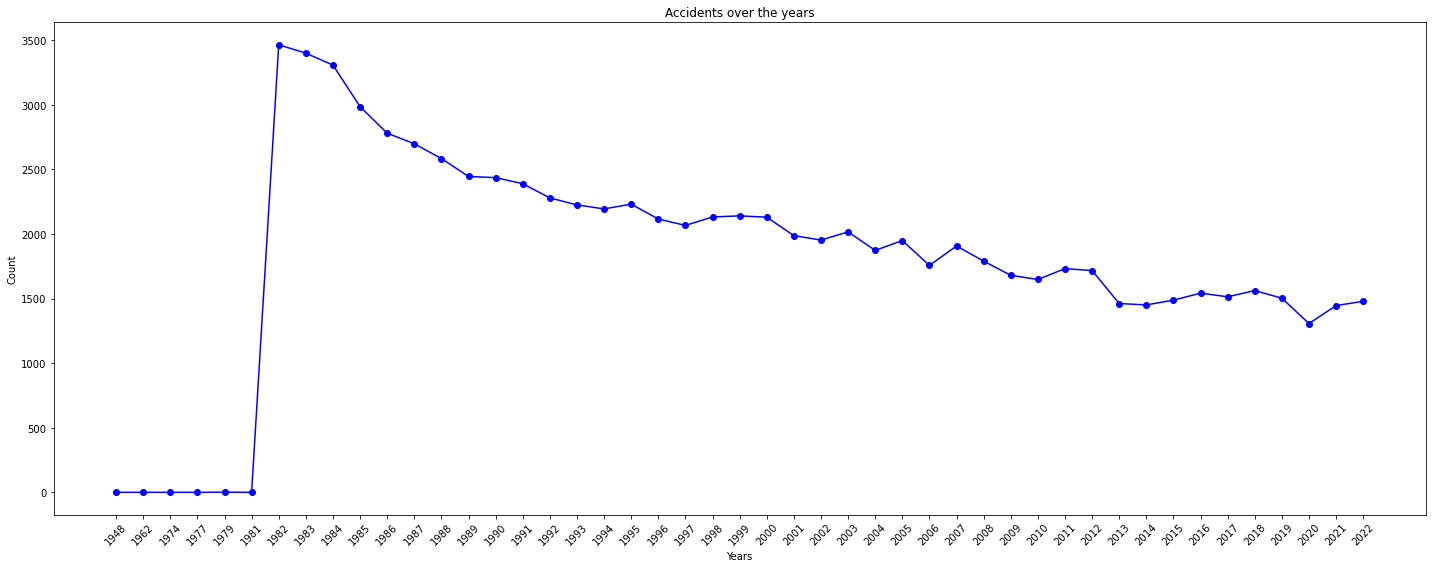

In [48]:
# Extracting the value counts of the years which represent the count of accident in a specific year.
year_trend= avi_df_clean["year"].value_counts().sort_index()
x_= year_trend.index.astype(str)
y_ = year_trend.values
# Customizing the plot
fig,ax = plt.subplots(figsize= (20,8))
ax.plot(x_, y_ ,marker="o", color='blue')
ax.set_xlabel('Years')
plt.xticks(x_, rotation=45)
ax.set_ylabel('Count')
ax.set_title('Accidents over the years')
plt.tight_layout() 
plt.show()

## Bar plot showing the count of total fatal and non-fatal injuries through out the years

In [49]:
# Grouping by year and severity category
severity_counts = avi_df_clean.groupby(['year', 'severity_category']).size().reset_index(name='count')
severity_counts.sort_values(by='count', ascending=False)

,year,severity_category,count
8,1982,Non-Fatal,2813
10,1983,Non-Fatal,2742
12,1984,Non-Fatal,2685
14,1985,Non-Fatal,2419
17,1986,Non-Fatal,2258
...,...,...,...
5,1979,Non-Fatal,1
4,1979,Fatal,1
3,1977,Fatal,1
2,1974,Fatal,1


In [50]:
# Pivoting to easen plotting and for filling null values in the pivot table
severity_pivot = severity_counts.pivot(index='year', columns='severity_category', values='count').fillna(0)


<Figure size 1080x576 with 0 Axes>

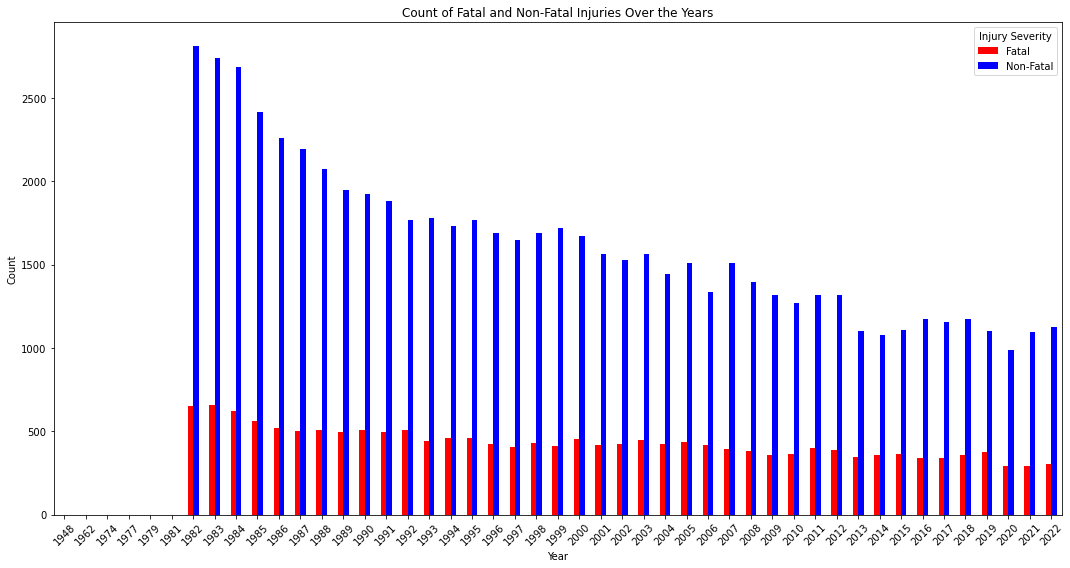

In [51]:
#Plotting and customizing the plot

plt.figure(figsize=(15, 8))
severity_pivot[['Fatal', 'Non-Fatal']].plot(kind='bar', figsize=(15, 8), color=['red', 'blue'])
plt.title('Count of Fatal and Non-Fatal Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show();

## 

## Bar plot showing the count of accidents by top 35 aircaft make

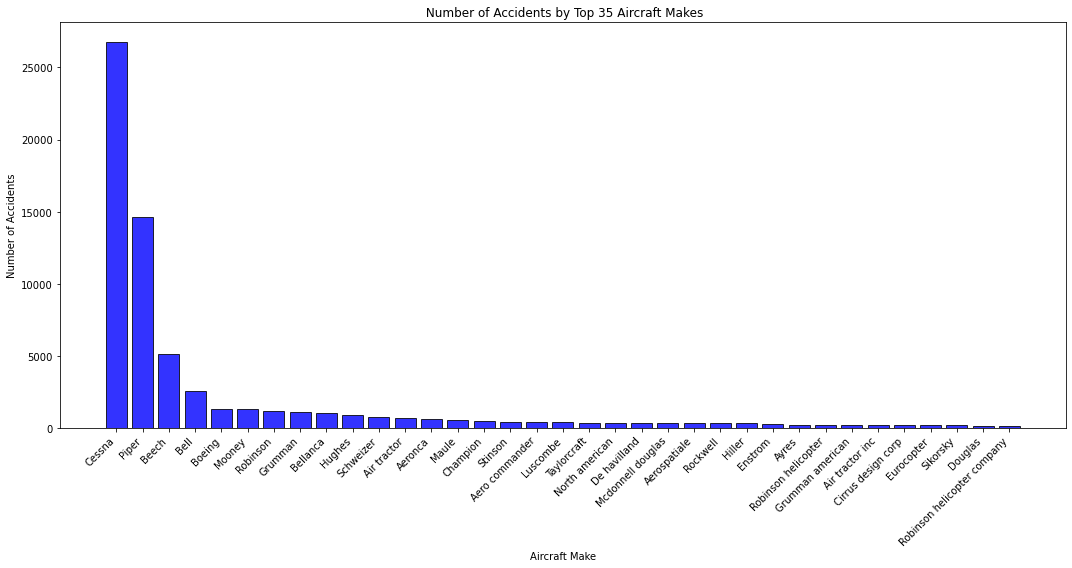

In [52]:

# Group by aircraft make and count the number of accidents
make_counts = avi_df_clean['make'].value_counts().head(35)

# Extracting labels
x_ = make_counts.index
y_ = make_counts.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x_, y_, color='blue', edgecolor='black', alpha=0.8)

# Customizing the plot
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Accidents')
ax.set_title(' Number of Accidents by Top 35 Aircraft Makes')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.show();


###  Insights
- **Cessna and Piper dominate** the accident dataset. This is likely a result of their popularity and widespread usage in general aviation and training, which increases exposure to accidents.
- The presence of manufacturers like **Boeing** and **Bell** suggests the dataset includes a mix of commercial airliners and specialized aircraft like helicopters.
- The smaller accident numbers for less common manufacturers, such as **Taylorcraft** and **Luscombe**, could be due to their limited production and operation scale.

Overall, the distribution of accident counts aligns with the operational scale and popularity of these aircraft, with more commonly used makes experiencing higher accident counts.


In [53]:
# Showcasing the accident counts values of the top 35 aircraft makes
make_counts

Cessna                         26780
Piper                          14654
Beech                           5165
Bell                            2592
Boeing                          1355
Mooney                          1308
Robinson                        1213
Grumman                         1156
Bellanca                        1039
Hughes                           920
Schweizer                        769
Air tractor                      689
Aeronca                          632
Maule                            587
Champion                         517
Stinson                          436
Aero commander                   420
Luscombe                         414
Taylorcraft                      383
North american                   377
De havilland                     375
Mcdonnell douglas                359
Aerospatiale                     348
Rockwell                         348
Hiller                           347
Enstrom                          289
Ayres                            236
R

##  Bar chart showing the top 35 aircraft make and model combinations with the highest number of accidents

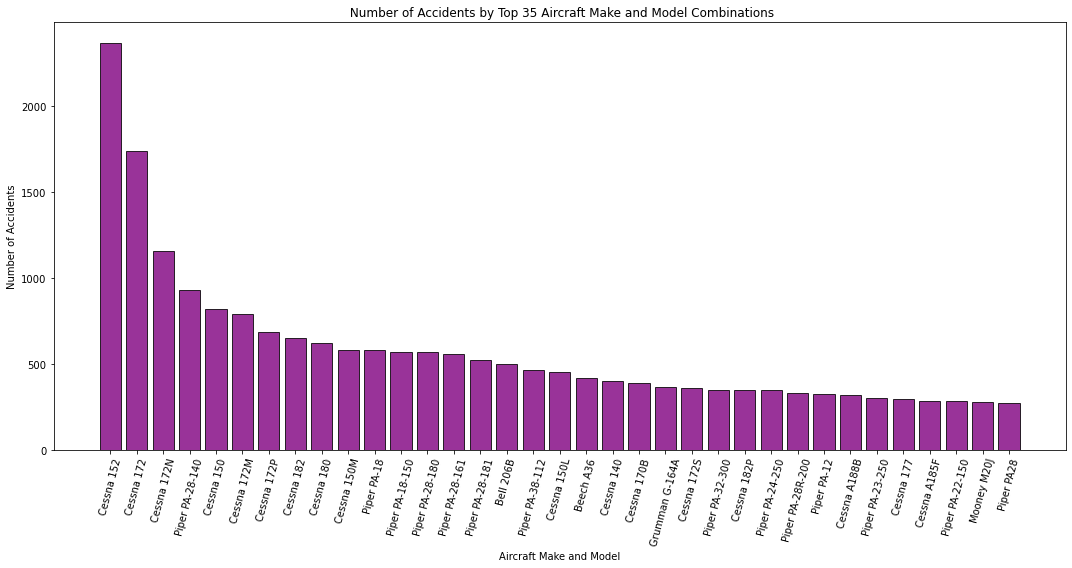

In [54]:
# Extracting the make_model and count the number of accidents
make_model_counts = avi_df_clean['make_model'].value_counts().head(35)

# Extracting labels
x_ = make_model_counts.index
y_ = make_model_counts.values

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(x_, y_, color='purple', edgecolor='black', alpha=0.8)

# Customizing the plot
ax.set_xlabel('Aircraft Make and Model')
ax.set_ylabel('Number of Accidents')
ax.set_title(' Number of Accidents by Top 35 Aircraft Make and Model Combinations')
plt.xticks(rotation=75)  # Rotating x-axis ticks for better readability

plt.tight_layout()
plt.show();


In [55]:
# Showing the values
make_model_counts

Cessna 152          2368
Cessna 172          1741
Cessna 172N         1157
Piper PA-28-140      928
Cessna 150           821
Cessna 172M          790
Cessna 172P          684
Cessna 182           653
Cessna 180           620
Cessna 150M          582
Piper PA-18          578
Piper PA-18-150      571
Piper PA-28-180      571
Piper PA-28-161      560
Piper PA-28-181      525
Bell 206B            498
Piper PA-38-112      464
Cessna 150L          454
Beech A36            415
Cessna 140           401
Cessna 170B          389
Grumman G-164A       365
Cessna 172S          361
Piper PA-32-300      350
Cessna 182P          350
Piper PA-24-250      349
Piper PA-28R-200     329
Piper PA-12          323
Cessna A188B         316
Piper PA-23-250      300
Cessna 177           294
Cessna A185F         283
Piper PA-22-150      281
Mooney M20J          280
Piper PA28           274
Name: make_model, dtype: int64

## Horizontal Bar graphs showing the accident count of 10 Common aircraft make grouped by model

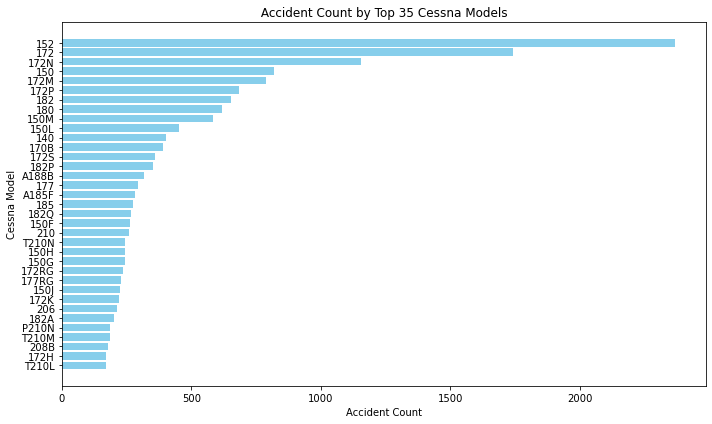

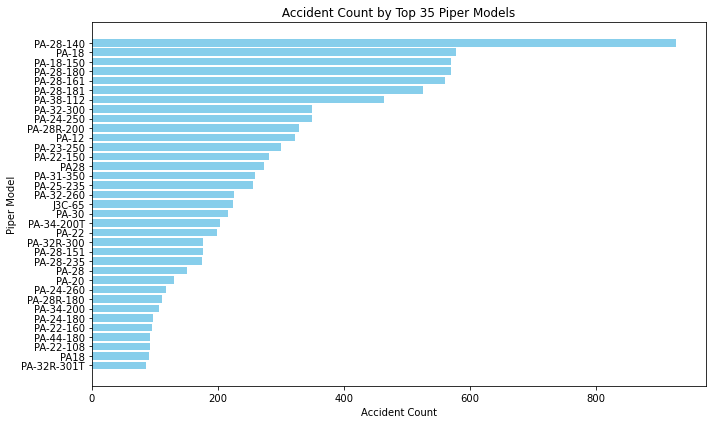

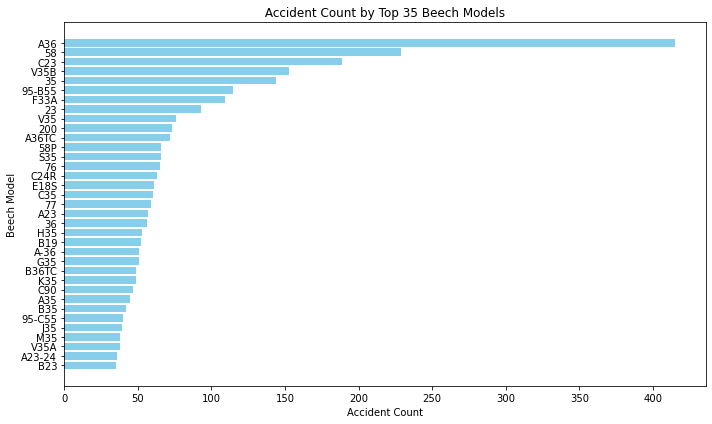

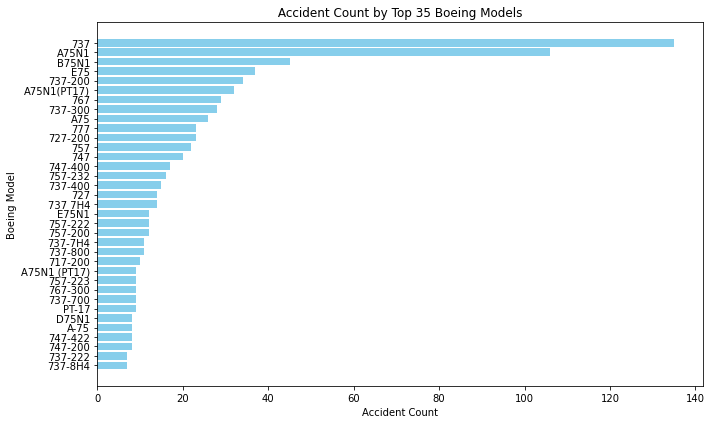

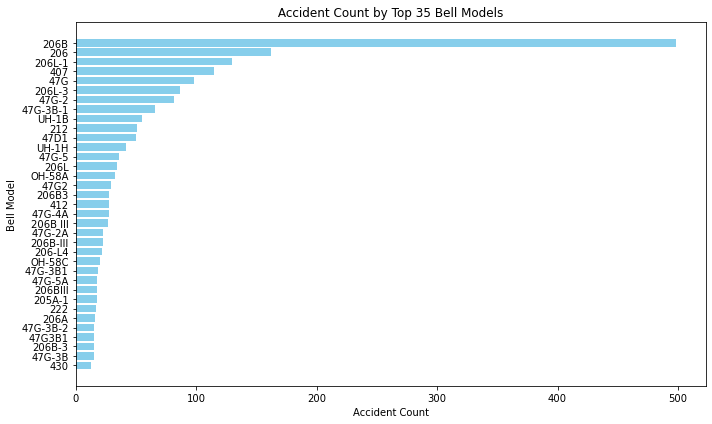

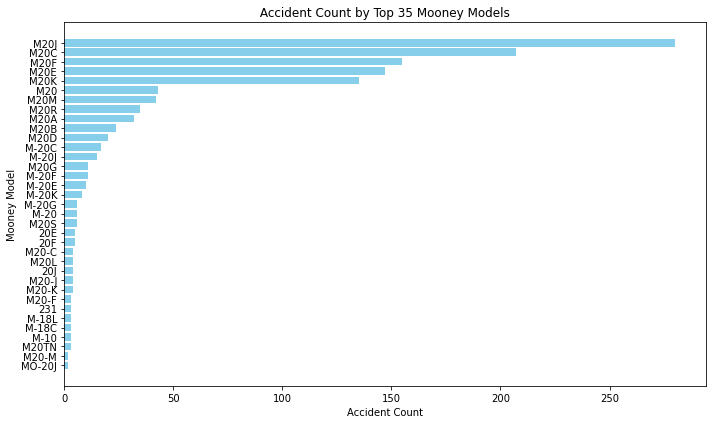

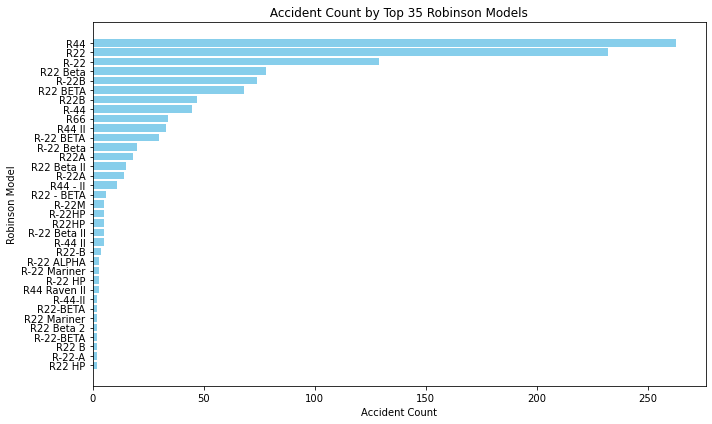

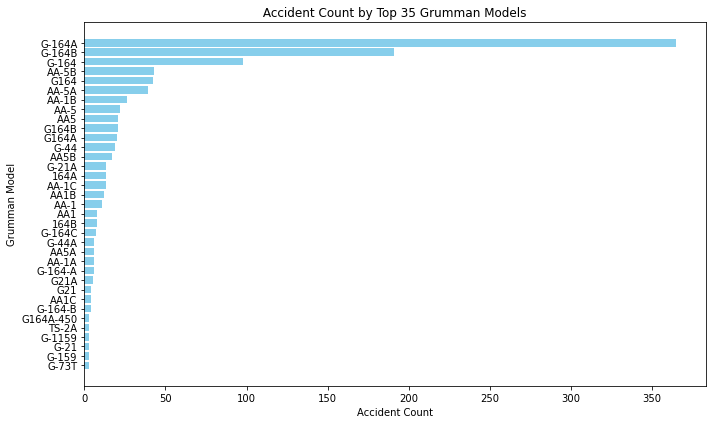

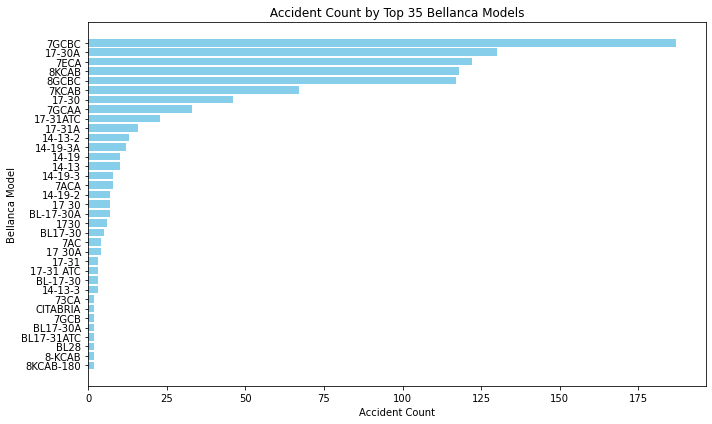

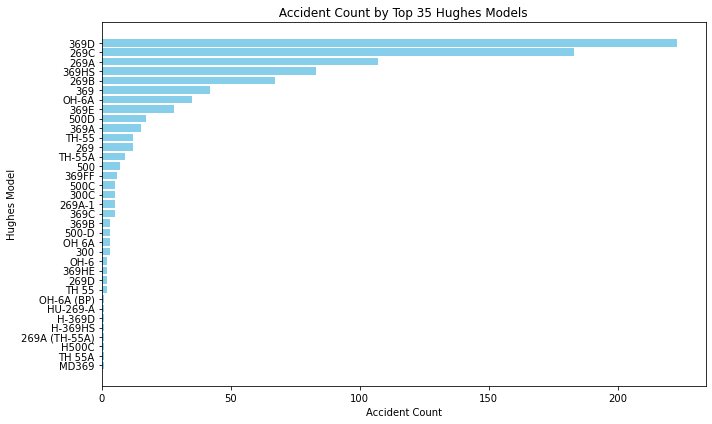

In [56]:
def plot_top_models_by_make(dataframe, make_name, top_n=35):
    """
    Plots a horizontal bar chart of the top models by accident count for a given make.
    
    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the aviation data.
        make_name (str): The name of the make to filter (e.g., 'Cessna').
        top_n (int): The number of top models to display in the chart.
    """
    # Filter rows for the specified make and group by model
    model_counts = (dataframe[dataframe['make'] == make_name]
                    .groupby(['model'])
                    .size()
                    .reset_index(name='accident_count'))
    
    # Sort by accident count in descending order and get the top N models
    top_models = model_counts.sort_values(by='accident_count', ascending=False).head(top_n)
    
    # Extract data for plotting
    models = top_models['model']
    accident_counts = top_models['accident_count']
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(models, accident_counts, color='skyblue')
    
    # Add titles and labels
    plt.title(f' Accident Count by Top {top_n} {make_name} Models ')
    plt.xlabel('Accident Count')
    plt.ylabel(f'{make_name} Model')
    
    # Invert y-axis to show the model with the highest count at the top
    plt.gca().invert_yaxis()
    
    # Display the chart
    plt.tight_layout()
    plt.show()

# Popular makes
makes = ['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Mooney',  
         'Robinson', 'Grumman', 'Bellanca', 'Hughes']

for make in makes:
    plot_top_models_by_make(avi_df_clean, make_name=make, top_n=35)


### Recommendations for Aircraft Models Based on Accident Counts

#### Models to Avoid (Higher Accident Counts)
To reduce risk, the following aircraft models with higher accident counts should be avoided:

- **Cessna Models**:  
  - 152, 172, 172N, 150, 172M, 172P, 182, 180, 150M  

- **Piper Models**:  
  - PA-28-140, PA-18, PA-18-150, PA-28-180, PA-28-161, PA-28-181, PA-38-112  

- **Beech Models**:  
  - A36, 58, C23, V35B, 35, 95-B55, F33A, 23  

- **Boeing Models**:  
  - 737, A75N1, B75N1, E75, 737-200, A75N1(PT17)  

- **Bell Models**:  
  - 206B, 206, 206L-1, 407, 47G, 206L-3  

- **Mooney Models**:  
  - M20J, M20C, M20F, M20E, M20K  

- **Robinson Models**:  
  - R44, R22, R-22, R22 BETA, R-22B  

- **Grumman Models**:  
  - G-164A, G-164B, G-164, AA-5B  

- **Bellanca Models**:  
  - 7GCBC, 17-30A, 7ECA, 8KCAB, 17-30  

- **Hughes Models**:  
  - 369D, 269C, 269A, 369HS  

#### Models to Consider (Lower Accident Counts)
Aircraft models with lower accident counts are recommended for safer operations.



## Bar chart showing Total Fatal Injuries by  top 35 Aircraft Makes 

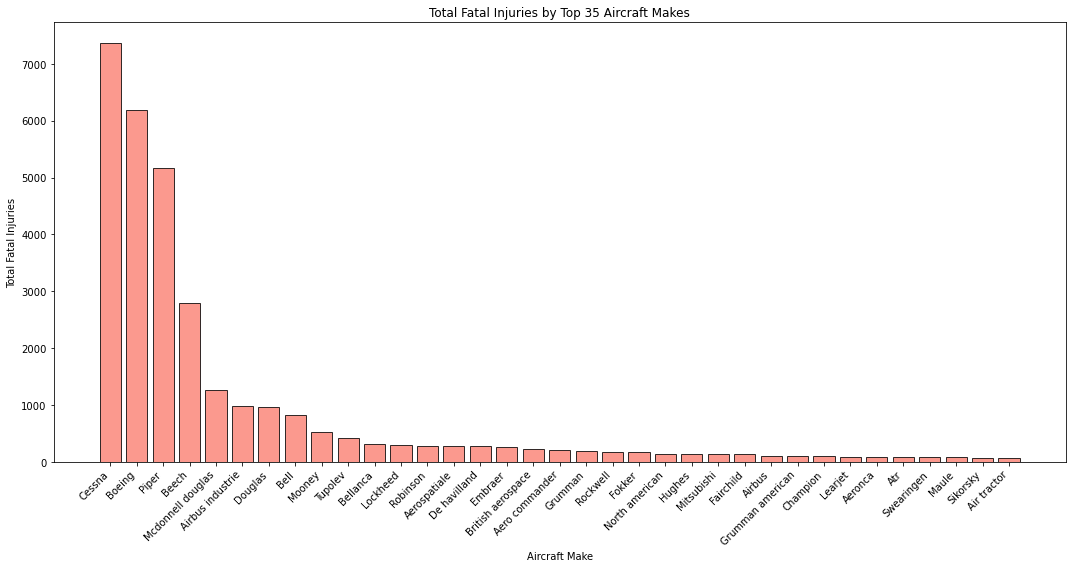

In [57]:
# Group by 'make' and sum the total fatal injuries
make_fatal_injuries = (avi_df_clean.groupby('make')['totalfatal_injuries']
                       .sum()
                       .sort_values(ascending=False)
                       .reset_index())

# Extract the top 20 makes with the highest total fatal injuries
top_35_makes_fatal = make_fatal_injuries.head(35)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_35_makes_fatal['make'], top_35_makes_fatal['totalfatal_injuries'],
        color='salmon', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Total Fatal Injuries by Top 35 Aircraft Makes')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45,fontsize=10, ha='right')
plt.tight_layout()

# Display the plot
plt.show()



## Bar chart showing Total Fatal Injuries by Top 35 Make-Model Combinations 

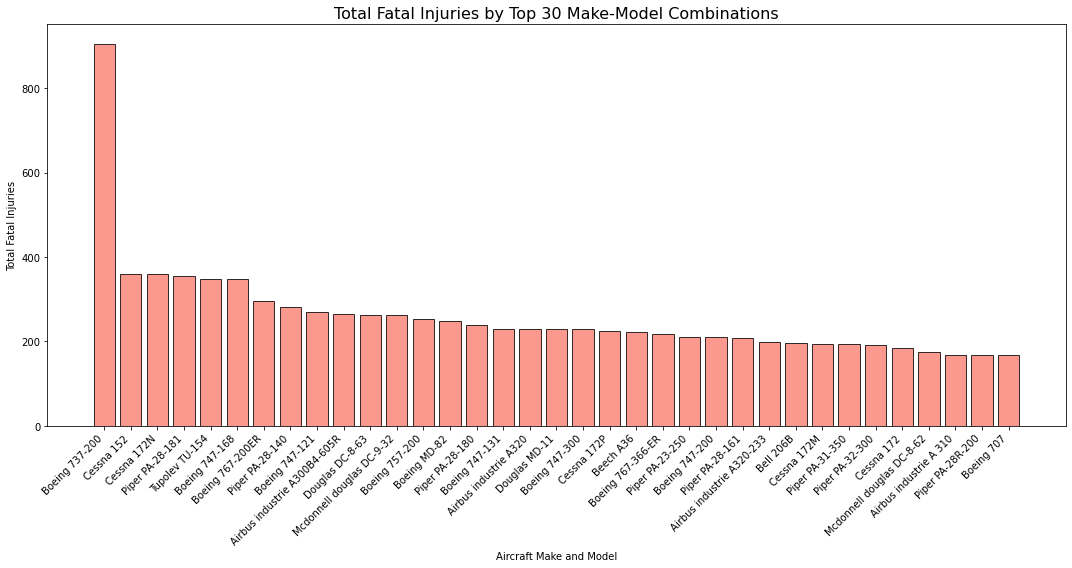

In [58]:
# Group by 'make_model' and sum the total fatal injuries
make_model_fatal_injuries = (avi_df_clean.groupby('make_model')['totalfatal_injuries']
                             .sum()
                             .sort_values(ascending=False)
                             .reset_index())

# Extract the top 35 make-model combinations with the highest total fatal injuries
top_35_make_model_fatal = make_model_fatal_injuries.head(35)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_35_make_model_fatal['make_model'], top_35_make_model_fatal['totalfatal_injuries'],
        color='salmon', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Total Fatal Injuries by Top 30 Make-Model Combinations', fontsize=16)
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()




### Aircraft Models to Avoid by Make since the have a high fatality count

#### Boeing       
- 737-200, 747-168, 747-121, 747-131, 747-200, 747-300, 757-200, 767-200ER, 767-366-ER, 707  

#### Cessna
- 152, 172, 172N, 172M, 172P  

#### Piper
- PA-28-140, PA-28-161, PA-28-180, PA-28-181, PA-28R-200, PA-31-350, PA-32-300, PA-23-250  

#### Airbus Industrie
- A30084-605R, A320, A320-233,A310  

#### Tupolev
- TU-154  

#### Douglas
- DC-8-63, DC-8-62, MD-11  

#### McDonnell Douglas
- DC-9-32, MD-82  

#### Beech
- A36  

#### Bell
- 206B  
  

## Top 20 total serious injuries by make

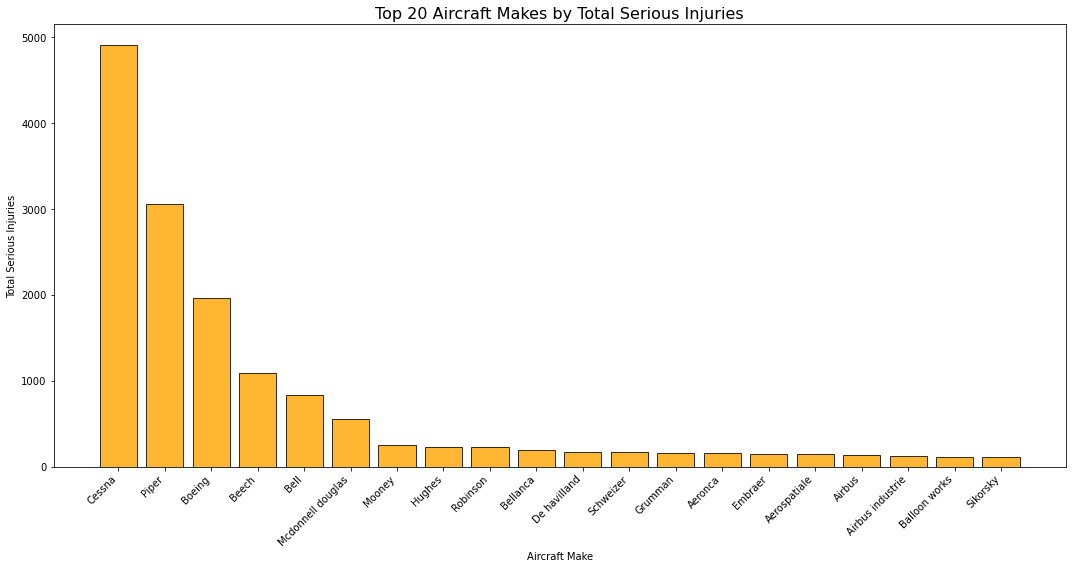

In [59]:
# Group by 'make' and sum the total serious injuries
make_serious_injuries = (avi_df_clean.groupby('make')['total_serious_injuries']
                         .sum()
                         .sort_values(ascending=False)
                         .reset_index())

# Extract the top 20 makes with the highest total serious injuries
top_20_makes_serious = make_serious_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_makes_serious['make'], top_20_makes_serious['total_serious_injuries'],
        color='orange', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Aircraft Makes by Total Serious Injuries', fontsize=16)
plt.xlabel('Aircraft Make')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


## Top 20 total serious injuries by make and model

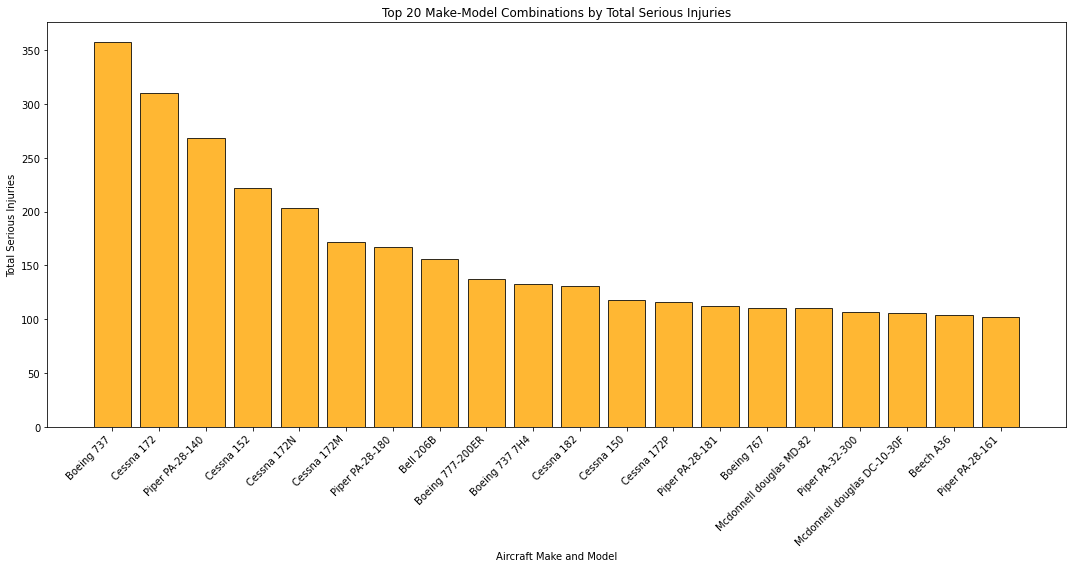

In [60]:
# Group by 'make_model' and sum the total serious injuries
make_model_serious_injuries = (avi_df_clean.groupby('make_model')['total_serious_injuries']
                               .sum()
                               .sort_values(ascending=False)
                               .reset_index())

# Extract the top 20 make-model combinations with the highest total serious injuries
top_20_make_model_serious = make_model_serious_injuries.head(20)

# Plotting the bar chart
plt.figure(figsize=(15, 8))
plt.bar(top_20_make_model_serious['make_model'], top_20_make_model_serious['total_serious_injuries'],
        color='orange', edgecolor='black', alpha=0.8)

# Customizing the plot
plt.title('Top 20 Make-Model Combinations by Total Serious Injuries')
plt.xlabel('Aircraft Make and Model')
plt.ylabel('Total Serious Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()


**The above aircraft makes and models should be avoided at all cost, they still appear under aircraft Models and makes to Avoid by Total Fatal injuries.**

## Bar chart showing Count of accidents by engine type

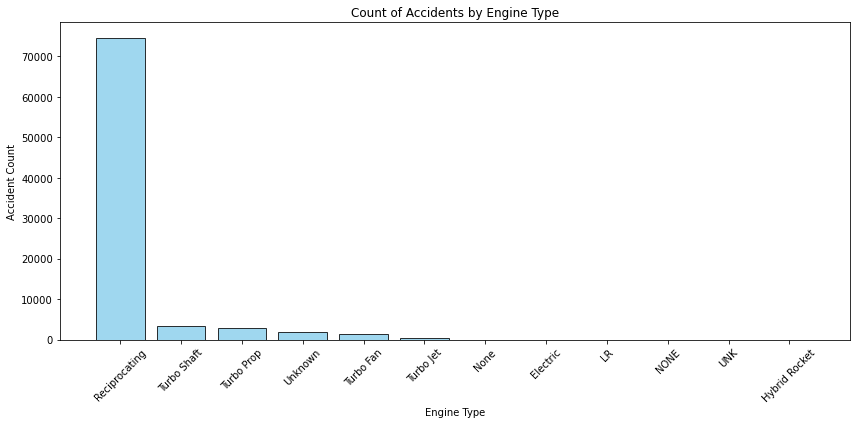

In [61]:
# Group by 'engine_type' and count the number of accidents
engine_type_counts = avi_df_clean['engine_type'].value_counts()

# Sorting the values in descending order
engine_type_counts = engine_type_counts.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(engine_type_counts.index, engine_type_counts.values, color='skyblue', edgecolor='black', alpha=0.8)

# Adding titles and labels
plt.title('Count of Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()


### Insights from the Bar Chart: Engine Types and Accident Counts

 **Key Finding:**  
Aircraft equipped with **Reciprocating engines** have the **highest count of accidents** compared to other engine types.

---

### Focus on Major Engine Types in Commercial Aviation  
The chart highlights accident counts across the **four major engine types** commonly found in commercial airplanes:

1. **Reciprocating Engines**   
   - Highest accident count, signaling the need for deeper analysis and improved safety measures.  

2. **Turbo Shaft Engines**   
   - Typically found in helicopters; exhibits a moderate level of accident occurrences.  

3. **Turbo Prop Engines**   
   - Used in smaller regional aircraft; shows lower accident counts compared to reciprocating engines.  

4. **Turbo Fan Engines**   
   - Found in large commercial jets; demonstrates a relatively low accident rate, reflecting advanced safety standards.  

---

### Takeaway:  
This data emphasizes the need for targeted safety measures and maintenance practices, particularly for **reciprocating engine aircraft**, to reduce accident rates.


## Bar chart showing the count of accidents grouped by number of engines:

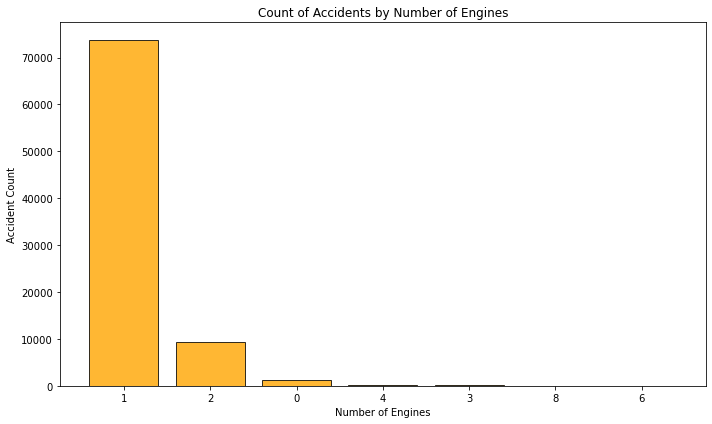

In [62]:
import matplotlib.pyplot as plt

# Group by 'number_of_engines' and count the number of accidents
engine_count_accidents = avi_df_clean['number_of_engines'].value_counts()

# Sorting the values in descending order
engine_count_accidents = engine_count_accidents.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(engine_count_accidents.index.astype(str), engine_count_accidents.values, color='orange', edgecolor='black', alpha=0.8)

# Adding titles and labels
plt.title('Count of Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.xticks(rotation=0)

# Adjust layout for better visibility
plt.tight_layout()

# Display the plot
plt.show()


**The above bar chart shows that most aircrafts with only one engine have the highest number of accidents.**

## Bar charts showing the accident counts by make & model engine type

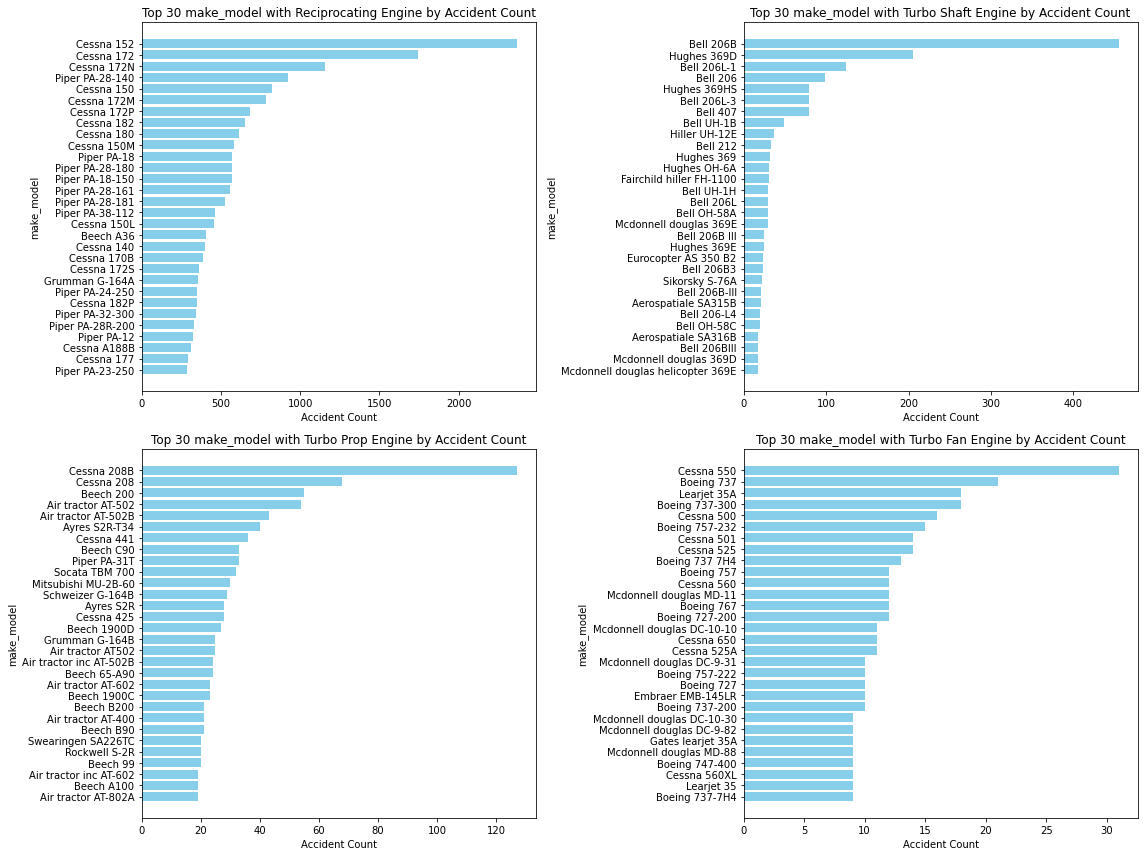

In [63]:
# List of engine types I am interested in
engine_types = ['Reciprocating', 'Turbo Shaft', 'Turbo Prop', 'Turbo Fan']

# Create a figure with multiple subplots (one for each engine type)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each engine type and plot the top 30 make_model combinations
for i, engine_type in enumerate(engine_types):
    # Filter rows based on the engine type
    engine_df = avi_df_clean[avi_df_clean['engine_type'] == engine_type]
    
    # Group by make_model and count the number of accidents
    make_model_engine_count = engine_df.groupby('make_model').size().reset_index(name='accident_count')
    
    # Sort by accident count in descending order and get the top 20 make_model combinations
    top_30_engine_make_model = make_model_engine_count.sort_values(by='accident_count', ascending=False).head(30)
    
    # Plotting the bar chart for the current engine type
    axes[i].barh(top_30_engine_make_model['make_model'], top_30_engine_make_model['accident_count'], color='skyblue')
    axes[i].set_title(f'Top 30 make_model with {engine_type} Engine by Accident Count')
    axes[i].set_xlabel('Accident Count')
    axes[i].set_ylabel('make_model')
    axes[i].invert_yaxis()  # Invert y-axis to show the make_model with the highest count at the top

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## Recommended Aircraft by Engine Type Based on Lowest Accident Counts

Based on the bar charts, the following aircraft makes and models are recommended for purchase, as they have the least number of accidents for their respective engine types:

---

###  **Reciprocating Engine**
- Piper PA-23-250
- Cessna 177
- Piper PA-32-300



###  **Turbo Shaft Engine**
- McDonnell Douglas Helicopter 369E
- Bell 206BIII
- Sikorsky S-76A



###  **Turbo Prop Engine**
- Beech 99
- Cessna 425


###  **Turbo Fan Engine**
- Cessna 560XL 
- Boeing 737-7H4  
- Boeing 747-400 
- McDonnell Douglas DC-9-82  
- McDonnell Douglas DC-10-30  
- Boeing 757-222  
- Cessna 525A  
- Boeing 767


### Bar charts showing the accident counts by make & model number of engines

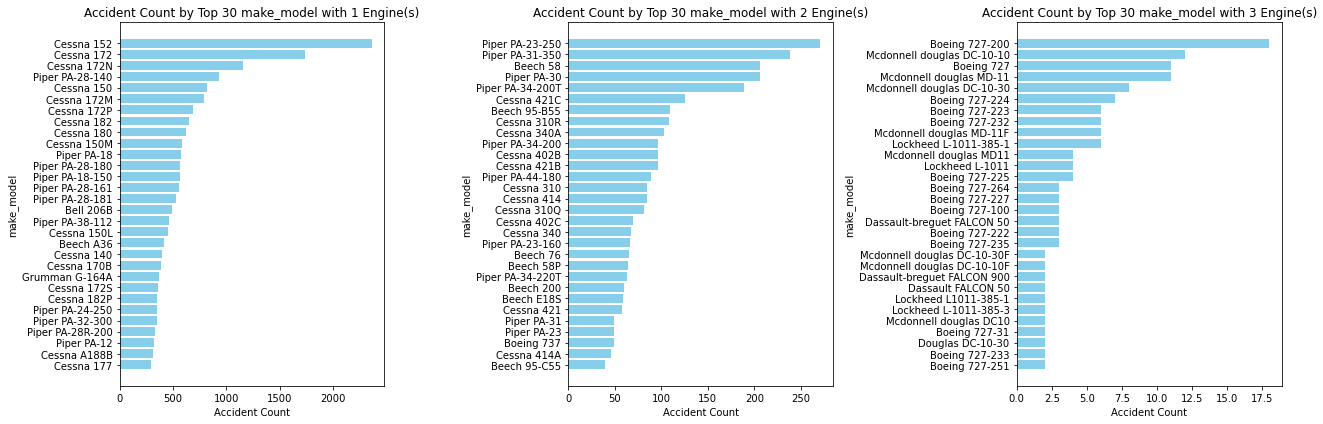

In [70]:
# List of engine counts I am interested in
engine_counts = [1, 2, 3]

# Create a figure with multiple subplots (one for each engine count)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each engine count and plot the top 20 make_model combinations
for i, engine_count in enumerate(engine_counts):
    # Filter rows based on the number of engines
    engine_df = avi_df_clean[avi_df_clean['number_of_engines'] == engine_count]
    
    # Group by make_model and count the number of accidents
    make_model_engine_count = engine_df.groupby('make_model').size().reset_index(name='accident_count')
    
    # Sort by accident count in descending order and get the top 30 make_model combinations
    top_30_engine_make_model = make_model_engine_count.sort_values(by='accident_count', ascending=False).head(30)
    
    # Plotting the bar chart for the current engine count
    axes[i].barh(top_30_engine_make_model['make_model'], top_30_engine_make_model['accident_count'], color='skyblue')
    axes[i].set_title(f'Accident Count by Top 30 make_model with {engine_count} Engine(s)')
    axes[i].set_xlabel('Accident Count')
    axes[i].set_ylabel('make_model')
    axes[i].invert_yaxis()  # Inverting the y-axis to show the make_model with the highest count at the top

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


##  Recommended Aircraft by Engine Number Based on Lowest Accident Counts

Based on the bar charts, the following aircraft makes and models are recommended for purchase, as they have the **least number of accidents** for their respective engine configurations:

---

###  **Single Engine Aircraft**  
- Piper PA-24-250
- Cessna 177
- Piper PA-32-300  



###  **Twin Engine Aircraft**  
- Cessna 414A  
- Piper PA-31  



###  **Triple Engine Aircraft**  
- Boeing 727-251
- Douglas DC-10-30  





### Bar charts showing accident counts based on two weather conditions

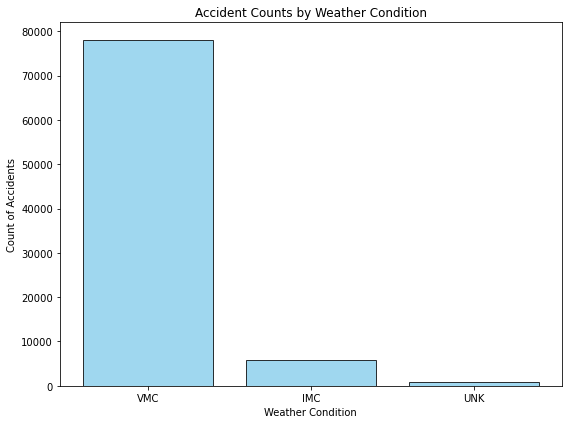

In [65]:
# Count occurrences of each weather condition
weather_counts = avi_df_clean['weather_condition'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(weather_counts.index, weather_counts.values, color='skyblue', edgecolor='black', alpha=0.8)

# Adding titles and labels
plt.title('Accident Counts by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Accidents')

# Displaying the chart
plt.tight_layout()
plt.show()

The graph above highlights that most occurrences involve Visual Meteorological Conditions (VMC), with significantly fewer cases for Instrument Meteorological Conditions (IMC).

## Conclusions

### Recommendations
Based on the analysis conducted, the following recommendations are proposed for the business:  
1. **Focus on Low-Risk Aircraft**: Prioritize purchasing aircraft models and makes with lower accident counts and minimal severe outcomes, such as fatalities or serious injuries, which aligns with the goal of reducing operational risks.  
2. **Engine Type and Configuration**: Invest in aircraft with reliable engine configurations, such as those with turbo-prop & turbo-fan engines, as these were associated with consistent safety records in the analysis.  
3. **Operational Planning**: Develop operational strategies that favor Instrument Meteorological Conditions (IMC), as these conditions have significantly fewer accidents compared to  Visual Meteorological Conditions (VMC).

### Limitations
While the analysis provides actionable insights, there are some limitations to consider:  
-  Missing or inconsistent data, such as unknown weather conditions or incomplete records, could impact the accuracy of the findings.  
- External factors, such as pilot experience, maintenance records, or geographical considerations, aircraft year of manufacture were not recorded. 
  

### Next Steps
To further improve this project and provide more robust recommendations, I suggest that one should:  
1. Include additional variables like pilot experience, aircraft age, and maintenance history to better understand their impact on safety.  
2. Use a more recent and comprehensive dataset to capture trends in modern aviation safety.  
3. Develop a risk-scoring model for aircraft based on accident severity, frequency, and other relevant metrics.  
4. Use machine learning models to predict the likelihood of accidents based on aircraft features and operational conditions.  
